coef:  [[ 5.07793064]]
intercept:  [ 25.21002155]
score:  0.878262470366


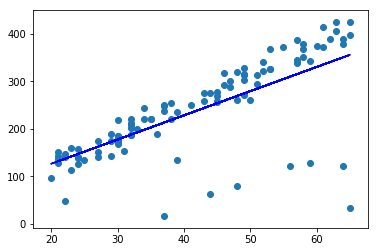

new_coef:  [[ 6.36859481]]
new_intercept:  [-6.91861069]
new_score:  0.983189455396


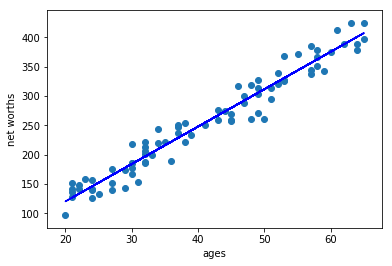

In [11]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(ages_train, net_worths_train)

print "coef: ", reg.coef_
print "intercept: ", reg.intercept_
print "score: ", reg.score(ages_test, net_worths_test)



def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errors = (predictions - net_worths) ** 2

    triplets = sorted(zip(ages, net_worths, errors),
                      key=lambda triplet: triplet[2])

    num_retain = int(len(predictions) * .9)
    cleaned_data = triplets[:num_retain]
    
    return cleaned_data




try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print "new_coef: ", reg.coef_
        print "new_intercept: ", reg.intercept_
        print "new_score: ", reg.score(ages_test, net_worths_test)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In [3]:
len(predictions)

90

In [4]:
len(ages_train)

90

In [5]:
len(net_worths_train)

90

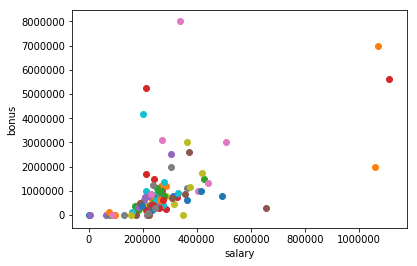

In [139]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below



for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [15]:
data.max()

97343619.0

In [136]:
data_dict.keys()[[index for index,i in enumerate(data_dict.values()) for k,v in i.items() if v == 97343619][0]]

'TOTAL'

In [140]:
data.max()

8000000.0

In [179]:
for index,i in enumerate(data_dict.values()):
    for k,v in i.items():
        if k == 'bonus':
            if v > 5000000 and v != 'NaN':
                print v

8000000
7000000
5249999
5600000


In [180]:
for index,i in enumerate(data_dict.values()):
    for k,v in i.items():
        if k == 'salary':
            if v > 1000000 and v != 'NaN':
                print v

1072321
1111258
1060932


In [181]:
a = [index for index,i in enumerate(data_dict.values()) for k,v in i.items() if (k == 'bonus' and v > 5000000 and v != 'NaN')]

In [182]:
b = [index for index,i in enumerate(data_dict.values()) for k,v in i.items() if (k == 'salary' and v > 1000000 and v != 'NaN')]

In [183]:
list((set(a).union(set(b)))^(set(a)^set(b)))

[65, 95]

In [184]:
list(set(a).intersection(set(b)))

[65, 95]

In [185]:
list(set(a).union(set(b)))

[128, 65, 82, 43, 95]

In [186]:
for i in list(set(a).union(set(b))):
    print i,data_dict.keys()[i]

128 FREVERT MARK A
65 LAY KENNETH L
82 BELDEN TIMOTHY N
43 LAVORATO JOHN J
95 SKILLING JEFFREY K


In [187]:
data_dict.keys()[65]

'LAY KENNETH L'

In [188]:
data_dict.keys()[95]

'SKILLING JEFFREY K'

In [171]:
a

[43, 65, 82, 95]

In [172]:
b

[65, 95, 128]

In [121]:
dic = {'a': { 'c' : '001', 'd': '003'}, 'b': { 'c' : '002', 'd': '004'}}

In [127]:
dic.values()

[{'c': '001', 'd': '003'}, {'c': '002', 'd': '004'}]

In [133]:
x = [index for index,i in enumerate(dic.values()) for k,v in i.items() if v == '002']

In [137]:
dic.keys()[[index for index,i in enumerate(dic.values()) for k,v in i.items() if v == '002'][0]]

'b'